<a href="https://colab.research.google.com/github/aureavaleria/DataBalancing-Research/blob/main/smote/explorando-imbalanced-learn/Comparando_Variantes_do_SMOTE_com_imbalanced_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparando Variantes do SMOTE com imbalanced-learn

Neste notebook, vamos explorar e comparar diferentes variantes do SMOTE usando a biblioteca `imbalanced-learn`:
- **SMOTE clássico**
- **BorderlineSMOTE**
- **ADASYN**
- **KMeansSMOTE**

O objetivo é demonstrar, de forma visual e didática, as diferenças entre as técnicas e em quais situações cada uma pode ser interessante.

---

**1. Importando bibliotecas**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, KMeansSMOTE


**2. Gerando um conjunto de dados sintético desbalanceado**

In [2]:
# Criando um dataset 2D para visualização
X, y = make_classification(n_samples=300,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.85, 0.15],
                           class_sep=1.2,
                           random_state=10)
print('Distribuição original:', dict(zip(*np.unique(y, return_counts=True))))

Distribuição original: {np.int64(0): np.int64(255), np.int64(1): np.int64(45)}


**3. Função de plotagem para comparar**

In [3]:
def plot_resampled(X, y, title, ax):
    ax.scatter(X[y==0][:,0], X[y==0][:,1], alpha=0.6, label='Classe 0 (majoritária)')
    ax.scatter(X[y==1][:,0], X[y==1][:,1], alpha=0.6, label='Classe 1 (minoritária)')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)


4. Aplicando as variantes do SMOTE

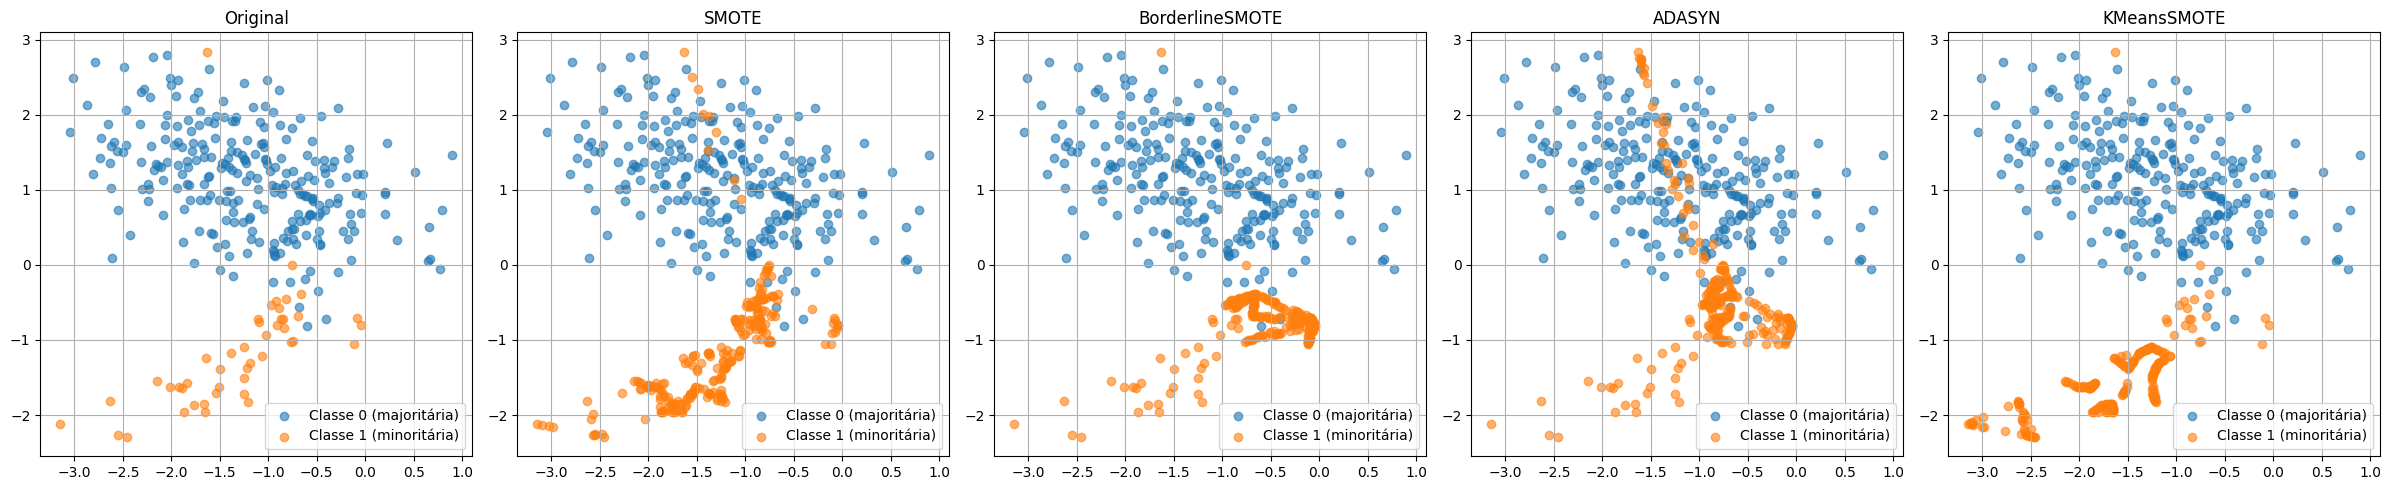

In [4]:
# Inicializando os métodos
samplers = {
    'SMOTE': SMOTE(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'KMeansSMOTE': KMeansSMOTE(random_state=42)
}

# Criando subplots para visualização
fig, axes = plt.subplots(1, 5, figsize=(24, 5))

# Plot original
plot_resampled(X, y, 'Original', axes[0])

# Aplicando e plotando cada variante
for ax, (name, sampler) in zip(axes[1:], samplers.items()):
    X_res, y_res = sampler.fit_resample(X, y)
    plot_resampled(X_res, y_res, name, ax)

plt.tight_layout()
plt.show()